In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("NuwaraEliyaArima.csv",parse_dates=['Month'],index_col=['Month'])

In [4]:
df.head()

,Production/Kg
Month,
2016-01-01,5687313.0
2016-02-01,5100250.0
2016-03-01,4507538.0
2016-04-01,6217476.0
2016-05-01,7709377.0


In [5]:
ts=df['Production/Kg'].resample('MS').sum()

In [6]:
ts.head()

Month
2016-01-01    5687313.0
2016-02-01    5100250.0
2016-03-01    4507538.0
2016-04-01    6217476.0
2016-05-01    7709377.0
Freq: MS, Name: Production/Kg, dtype: float64

<Axes: xlabel='Month'>

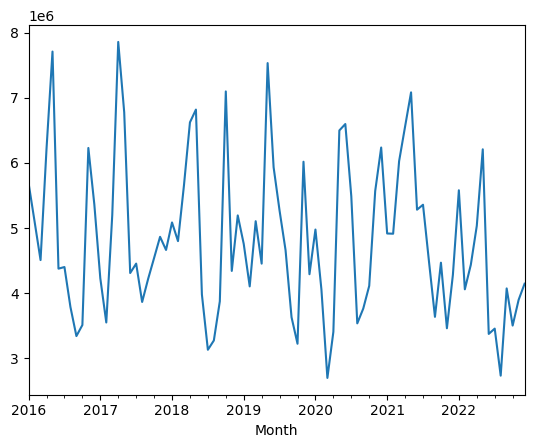

In [7]:
ts.plot()

In [8]:
import statsmodels.api as sm

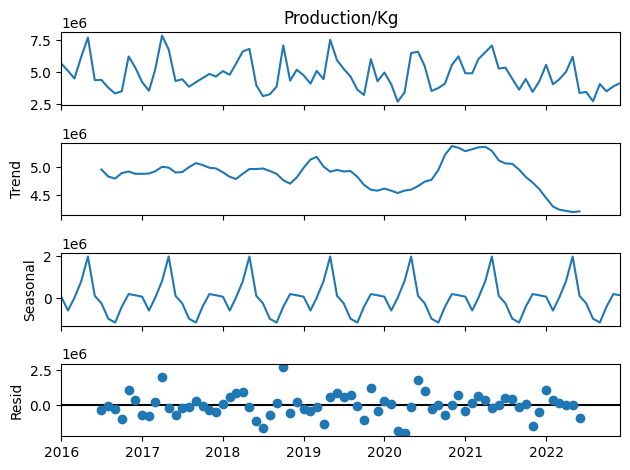

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
addtest=adfuller(ts)

In [48]:
print('pvalue of adfuller test is: ',addtest[1])

pvalue of adfuller test is:  1.6373525598762853e-07


In [13]:
len(ts)

84

In [14]:
train=ts[:64]
test=ts[64:]

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(train, order=(1, 0, 1)).fit()


In [17]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [18]:
len(train),(len(ts)-1)

(64, 83)

In [19]:
pred.head()

2021-05-01    5.438124e+06
2021-06-01    4.954896e+06
2021-07-01    4.951829e+06
2021-08-01    4.951810e+06
2021-09-01    4.951810e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
error=np.sqrt(mean_squared_error(test,pred))
error

1122110.692680598

In [22]:
mape1 = np.mean(np.abs((test - pred) / test)) * 100


In [23]:
print(f'Mean Absolute Percentage Error (MAPE): {mape1:.2f}%')


Mean Absolute Percentage Error (MAPE): 25.05%


In [24]:
test.mean(),np.sqrt(test.var())

(4426879.05, 1063996.1829328286)

<Axes: xlabel='Month'>

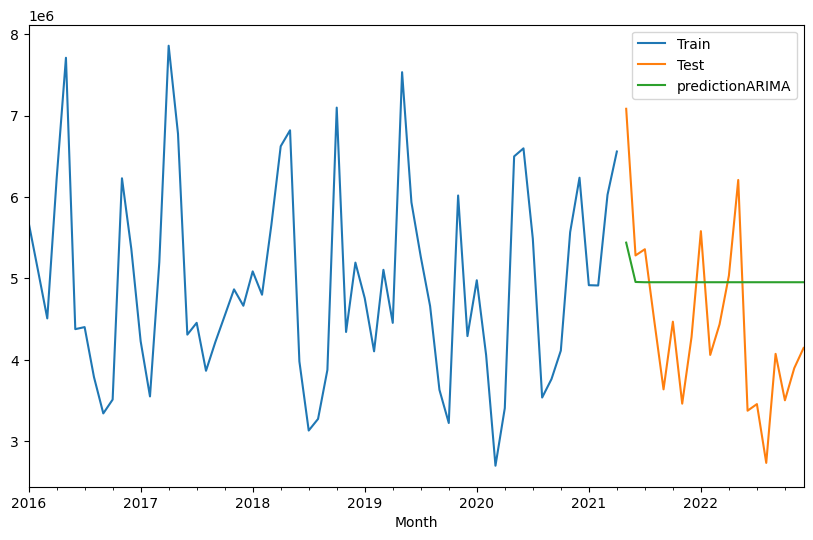

In [25]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionARIMA')

In [26]:
import itertools

In [27]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [28]:
pdq_combination=list(itertools.product(p,d,q))

In [29]:
len(pdq_combination)

128

In [30]:
rmse=[]
order1=[]

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [33]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [34]:
results.to_csv('NuwaraEliyaArima_ARIMA_result.csv')

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model2 = ARIMA(train, order=(5, 0, 6)).fit()


In [36]:
pred2=model2.predict(start=len(train),end=(len(ts)-1))

In [37]:
pred2.head()

2021-05-01    5.611228e+06
2021-06-01    5.079944e+06
2021-07-01    4.526796e+06
2021-08-01    4.155620e+06
2021-09-01    4.200106e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
pred2.tail()

2022-08-01    4.620350e+06
2022-09-01    4.688246e+06
2022-10-01    4.830411e+06
2022-11-01    4.930073e+06
2022-12-01    4.957162e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [39]:
error2=np.sqrt(mean_squared_error(test,pred2))
error2

1006304.7591942071

In [40]:
mape2 = np.mean(np.abs((test - pred2) / test)) * 100


In [41]:
print(f'Mean Absolute Percentage Error (MAPE): {mape2:.2f}%')

Mean Absolute Percentage Error (MAPE): 22.32%


In [42]:
final_model=ARIMA(ts,order=(5,0,6)).fit()

In [43]:
prediction2=final_model.predict(len(ts),len(ts)+6)

<Axes: xlabel='Month'>

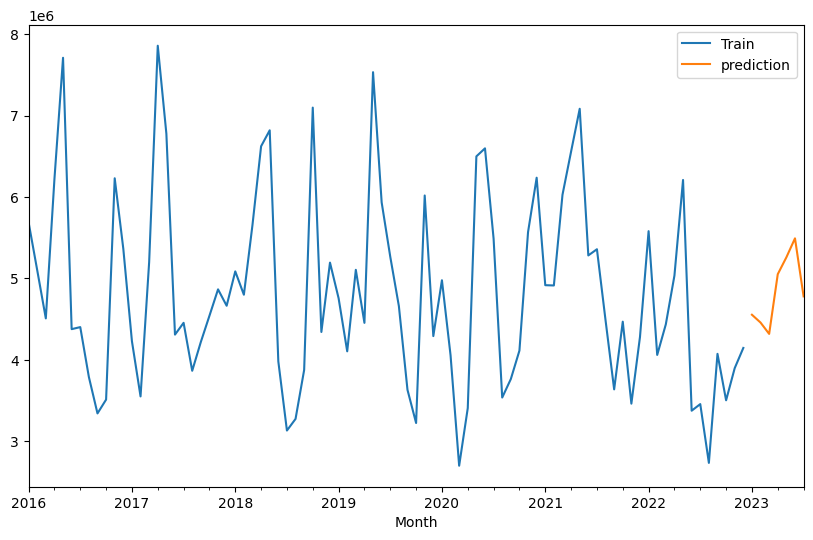

In [44]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction2.plot(legend=True,label='prediction')

In [45]:
prediction2.head()

2023-01-01    4.552317e+06
2023-02-01    4.456356e+06
2023-03-01    4.317065e+06
2023-04-01    5.050543e+06
2023-05-01    5.257677e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [46]:
prediction2.tail()

2023-03-01    4.317065e+06
2023-04-01    5.050543e+06
2023-05-01    5.257677e+06
2023-06-01    5.490991e+06
2023-07-01    4.777868e+06
Freq: MS, Name: predicted_mean, dtype: float64